# Matrix Norms

Author: * Mark Petersen *

## Introduction

This notebook will follow section 4.2 *Operator norms* in *Mathematical Methods and Algorithms for Signal Processing* by Todd K. Moon.

Operator Before learning about matrix norms, it is beneficial to look at the definition of a linear operator norm. We will then use this definition to analyze the geometry and boundedness of an operator norm. Then we will look at matrix norms and finish with an example.  


## Operator Norms

There are many ways of defining this norm, and one way to think about it is how much the operator will change the length of the vector it operates on. Let $X$ and $Y$ be $l_p$ or $L_p$, and let $A$ be a linear operator $A:X \rightarrow Y$. The $p$ **operator norm**, or $p$ norm, or $l_p$ norm, of $A$ is

$$ ||A||_p = \sup_{x \in X, \neq 0} \frac{||Ax||_p}{||x||_p} = \sup_{x \in X, ||x||_p=1} ||Ax||_p$$

where $|| \cdot ||_p$ is the $p$ norm. 

### Geometric Representation

A good way to visually look at how an operator norm changes the lengh of a vector is to look at how the subordinate matrix norm $||A||$ changes the unit circle. 

Let $x \in X , ||x|| = 1$ and $A \in R^{2x2}$ then $||A|| = \max y$ where $y \in Y, y = Ax$

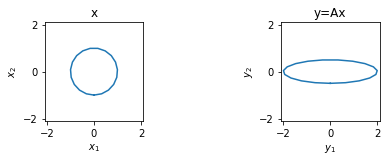

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def visualize(A = np.matrix([[2,0],[0,0.5]]), norm_type = 2):

    # Construct x s.t. ||x||_1 = 1
    if norm_type == 1:
        num_points = 5
        x1 = np.concatenate((np.linspace(0,1,num_points),np.linspace(1,0,num_points),
                        np.linspace(0,-1,num_points), np.linspace(-1,0,num_points)))
        x2 = np.concatenate((np.linspace(-1,0,num_points),np.linspace(0,1,num_points),
                             np.linspace(1,0,num_points),np.linspace(0,-1,num_points)))
        x = np.vstack([x1,x2])
    
    # Construct x s.t. ||x||_2 = 1
    elif norm_type == 2:
        angle = np.linspace(-np.pi, np.pi,20)
        x = np.vstack([np.sin(angle),np.cos(angle)])
    else:
        num_points = 5
        x1 = np.concatenate((np.linspace(-1,1,num_points),np.linspace(1,1,num_points),
                        np.linspace(1,-1,num_points), np.linspace(-1,-1,num_points)))
        x2 = np.concatenate((np.linspace(-1,-1,num_points),np.linspace(-1,1,num_points),
                             np.linspace(1,1,num_points),np.linspace(1,-1,num_points)))
        x = np.vstack([x1,x2]) 
    
    


    # Compute y
    y = A*x


    # Get maximum x and y axis values for plotting
    x_max = max(abs(np.concatenate((x[0,:],np.array(y[0,:]).reshape(-1,)) ) ))
    y_max = max(abs(np.concatenate((x[1,:],np.array(y[1,:]).reshape(-1,)))))
    dim_max = x_max if x_max > y_max else y_max
    dim_max += 0.1
    
    # Plot results

    plt.figure(1)
    plt.subplot(131,aspect='equal')
    plt.plot(x[0,:],x[1,:])
    plt.ylim([-dim_max,dim_max])
    plt.xlim([-dim_max,dim_max])
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title('x')

    plt.subplot(133,aspect='equal')
    plt.plot(np.array(y[0,:]).reshape(-1,),np.array(y[1,:]).reshape(-1,))
    plt.ylim([-dim_max,dim_max])
    plt.xlim([-dim_max,dim_max])
    plt.xlabel('$y_1$')
    plt.ylabel('$y_2$')
    plt.title('y=Ax')

visualize(norm_type = 2)

By visual inspection of the plots above, we can see how $||A||$ stretches the elements of $X$ when mapping them to $Y$. In this example $||A|| = 2$

### Bounded operators

The norm of an operator can be used to determine if a linear transformation is bounded, i.e. $A$ will map finite values in $X$ to finite values in $Y$. 

**Definition 4.3** If the norm of a transformation is finite, the transformation is said to be *bounded*. 

Using example 4.2.2 from the book.

Let $A:C^1[0,1] \rightarrow C[0,1]$ be the operator

$$ Ax = \frac{d}{dt}x $$

The function $x(t) = \sin(w_0t) \in C^1[0,1]$ has uniform norm 1 for any value of $w_0$, but

$$||Ax|| = \max_{t \in [0,1]} w_0|\cos w_0t|$$

may have norm arbitrarily large by choosing $w_0$ to be arbitrarily large. Thus the operator $A$ is not bounded. 

Widget Javascript not detected.  It may not be installed or enabled properly.


<function __main__.update>

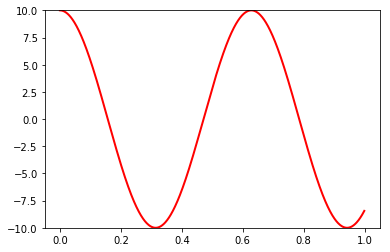

In [2]:
from ipywidgets import *

fig = plt.figure()

# Create x(t)
dt = 0.001
t = np.arange(0.0, 1.0, dt)
w_0 = 10;
x = np.sin(w_0*t)

# Create Ax(t)
y = w_0*np.cos(w_0*t)
l, = plt.plot(t, y, lw=2, color='red')

def update(w_0 = 10):
    l.set_ydata( w_0*np.cos(w_0*t))
    plt.axis(ymax=w_0, ymin=-w_0)
    fig.canvas.draw()
    

interact(update, w_0 = widgets.IntSlider(min=10,max=1000,step=10,value=10))

By moving the slider in the above figure, you can see as $w_0 \rightarrow \infty, ||Ax|| \rightarrow \infty$ while $x$ stays finite between $0$ and $1$. Thus the norm of the operator is not bounded for every finite value of $x$. The example at the end will show the importance of boundedness. 

### Submultiplicative Property

Let $X$ and $Y$ be $l_p$ or $L_p$, and let $A$ and $B$ be linear operators. The $p$ norm has the property for all $x \in X$ that 
$$||Ax||_p \leq ||A||_p||x||_p$$

Also, the $p$ norm satisfies the submultiplicative property
$$||AB||_p \leq ||A||_p||B||_p$$

From the previous equations we can deduce
$$||ABx||_p \leq ||A||_p||B||_p||x||_p$$

## Matrix Norms
So far we have generalized our study to any linear operator. The rest of this notebook will specialize on the matrix $p=1$, $p=2$, $p=\infty$ norms and the Frobenius norm. 

We will start by creating a basic, python, matrix class and add to it as different matrix norms are introduced.

In [3]:
class Matrix:
    def __init__(self,A=np.eye(3)):
        self.A = A

### Norm $p=\infty$

Let $A \in \mathbb{C}^{nxm}$, $\mathbf{y} \in \mathbb{C}^n$ and $\mathbf{x} \in \mathbb{C}^m$ the infinity norm is defined as
$$||A||_{\infty} = \max_{||\mathbf{x}||_{\infty}=1} ||A\mathbf{x}||_{\infty} = \max_{i}\sum_{j}|a_{ij}|$$
which is the largest row sum. This is saying that the largets element of $\mathbf{y}$ is composed of the largest row of $A$

In [4]:
class Matrix(Matrix):
    def pInfNorm(self):
        dim = self.A.shape
        
        pInf_max = 0
        
        # Find the abs, max, row sum
        for i in range(dim[0]):
            r_sum = np.sum(abs(self.A[i,:]))
            if r_sum > pInf_max:
                pInf_max = r_sum
        return pInf_max
            

Infinity Norm: 6


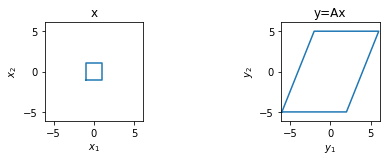

In [5]:
M = np.matrix([[4,2],[0,5]])
m = Matrix(M)
print("Infinity Norm:", m.pInfNorm())

visualize(m.A, norm_type=3)

By inspecting the above images, you can see that the infinity norm indicates how much $A$ stretches $\mathbf{x}$ along the axes of $\mathbf{y}$

### Norm $p=1$

The $p=1$ norm is defined as
$$||A||_1 = \max_{||\mathbf{x}||_{1}=1} ||A\mathbf{x}||_{1} = \max_{j}\sum_{i}|a_{ij}|$$
which is the largest column sum.

In [6]:
class Matrix(Matrix):
    def pOneNorm(self):
        dim = self.A.shape
        
        pOne_max = 0
        
        # Find the abs, max, row sum
        for i in range(dim[1]):
            c_sum = np.sum(abs(self.A[:,i]))
            if c_sum > pOne_max:
                pOne_max = c_sum
        return pOne_max

norm p=1: 7


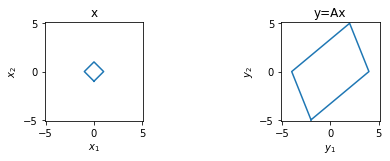

In [7]:
M = np.matrix([[4,2],[0,5]])
m = Matrix(M)
print("norm p=1:", m.pOneNorm())

visualize(m.A, norm_type=1)

### Norm $p=2$

The $p=2$ norm is defined as 

$$||A||_2 = \sqrt{\rho(A^HA)}$$

where

$$\rho(A) = \max_i |\lambda_i|$$

i.e. the square-root of the larget eigenvalue of $A^HA$.

Note * The book goes through the derivation of this norm using optimization and pinciples of eigenvalue that has not yet been covered, so I will skip the derivation of it. 

In [8]:
class Matrix(Matrix):
    def pTwoNorm(self):
        
        # Compose A^HA
        B = self.A.getH()*self.A
        
        # Find the eigen values
        w,v = np.linalg.eig(B)
        
        # get the square root of the largest eigen value
        rho = np.sqrt(w.max())
        
        return rho

norm p=2: 5.727806217396338


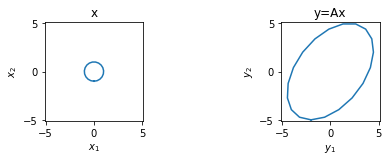

In [9]:
M = np.matrix([[4,2],[0,5]])
m = Matrix(M)
print("norm p=2:", m.pTwoNorm())

visualize(m.A, norm_type=2)

The above figures show how much the unit circle stretches along the eigenvectors of $A$

### Frobenius Norm

The Frobenius Norm is not a $p$ norm and it doesn't satisfy the submultiplicative property. This norm is often used in matrix analysis since it is relatively easy to compute. It is defined as

$$||A||_F = \sqrt{\mathrm{tr}(A^HA)}$$

i.e. the square root of the sum of all of the elements of $A$ squared.

In [10]:
class Matrix(Matrix):
    def frobNorm(self):
            
        # Square all of the elements of A
        A_2 = np.square(self.A)
        
        # Sum all of the elemenst of A
        f_sum = np.sum(A_2)
        
        # Square root the sum of all of the elements of A squared
        f_norm = np.sqrt(f_sum)
        
        return f_norm

In [11]:
M = np.matrix([[4,2],[0,5]])
m = Matrix(M)
print("norm p=2:", m.frobNorm())

norm p=2: 6.708203932499369


The Frobenius norm is often used when comparing how similar two matrices $A$ and $B$ are, using $||A-B||_F$.

## Matrix Norm Relationships

The follow relationships exist between the norms for an $m\times n$ matrix $A$

$$
\begin{array}{rcl} 
||A||_c                          & \leq ||A||_F & \leq \sqrt{n}||A||_2 \\ 
\max_{i,j}|a_{ij}|               & \leq ||A||_2 & \leq \sqrt{mn}\max_{i,j}|a_{ij}| \\
\frac{1}{\sqrt{n}}||A||_{\infty} & \leq ||A||_2 & \leq \sqrt{m}||A||_{\infty} \\
 \frac{1}{\sqrt{m}}||A||_{1}     & \leq ||A||_2 & \leq \sqrt{n}||A||_{1} 
\end{array}
$$

## Example Problem

![title](massSpring.png)

Consider a second order mass spring system

$$ m\ddot{x} + b\dot{x} + kx = F $$

where $m$ is the mass, $b$ is the damping coefficient, $k$ is the spring constant, $F$ the force being applied, $x$ the displacement of the mass from equilibrium.

The state space representation of the system can be expressed as 

$$ \dot{x} = Ax + Bu $$ 

where $A$ represents the internal dynamics of the system, $B$ represents the external dynamics of the system, $x$ represents the position and velosity of the mass, and $u$ represents the input. If we ignore the external dynamics of the system, the state space representation of the system can be expressed as

$$ \dot{x} = Ax$$

where

$$A=
\begin{bmatrix}
    1       & 1  \\
    -k/m       & -b/m     
\end{bmatrix}
$$

The solution to the second order system is 

$$x(t) = \exp^{-A t}x_0$$

by inspection, we can analyze $A$ to determine the rate of decay or how fast the perturbed system returns to equilibrium by analyzing the norm of $A$. The larger $||A||$ is, the faster the system returns to equilibrium. In essence, ||A|| measures how fast a system can change. 




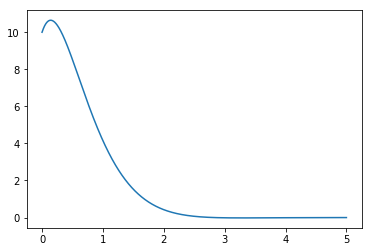

In [46]:
from scipy.linalg import expm

k = 10
m = 1
b = 5

A = np.matrix([[1,1],[-k/m,-b/m]])

# Create x(t)
dt = 0.001
t_end = 5


x_0 = np.matrix([[10],[0]])

x = []
x_dt = []

for t in np.arange(0.0, t_end, dt):
    x_t = expm(A*t)*x_0
    x.append(x_t[0,0].item())
    x_dt.append(x_t[1,0].item())
    

# Plot results
t = np.arange(0.0,t_end,dt)

plt.plot(t,x)
    
    